In [1]:
import os
import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

### The Goal of this analysis is to build a machine learning model that can predict Payment Default.

First Payment Default1 will be the Target Variable

In [2]:
mydata = pd.read_csv("2018-05-17-Recruit-Sample-Data-Train.csv")
mydata.head()

,SetID,Time of Application,State,Monthly Net Income,Paycheck Net Income,Rent or Own,Months at Residence,Bank Account Months,Pay Cycle,Loan Amount,Loan Funded Date,First Payment Default1,First Payment Default12,Loan Due Date,Loan Funded Date3,Loan Due Date_Dummy,Loan Funded Date_Dummy,LoanDays
0,436,2018-03-28T17:27:35Z,CA,2000.0,2000.0,R,12,6,Monthly,300.00,3/28/2018,False,0,2018-04-11,2018-03-28,4,3,14
1,615,2018-03-23T13:19:32Z,TX,3500.0,3500.0,R,60,60,Monthly,641.91,3/23/2018,False,0,2018-04-06,2018-03-23,4,3,14
2,1251,2018-02-28T12:04:56Z,CA,3000.0,3000.0,R,0,6,Monthly,117.65,2/28/2018,True,1,2018-03-30,2018-02-28,3,2,30
3,440,2018-03-28T15:47:59Z,CA,1500.0,1500.0,R,12,6,Monthly,117.65,3/28/2018,False,0,2018-04-28,2018-03-28,4,3,31
4,1692,2018-02-13T04:36:00Z,CA,2392.0,598.0,R,130,36,Weekly,300.00,2/13/2018,False,0,2018-02-23,2018-02-13,2,2,10


In [3]:
mydata.shape

(1600, 18)

In [4]:
mydata.nunique()

SetID                      1600
Time of Application        1590
State                         2
Monthly Net Income          502
Paycheck Net Income         492
Rent or Own                   2
Months at Residence         226
Bank Account Months          55
Pay Cycle                     4
Loan Amount                 113
Loan Funded Date             73
First Payment Default1        2
First Payment Default12       2
Loan Due Date                76
Loan Funded Date3            73
Loan Due Date_Dummy           4
Loan Funded Date_Dummy        4
LoanDays                     26
dtype: int64

### Checking the Missing Values

In [5]:
total = mydata.isnull().sum().sort_values(ascending=False)
percent_1 = mydata.isnull().sum()/mydata.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'],sort=False)
missing_data.head(26)


,Total,%
LoanDays,0,0.0
Loan Funded Date_Dummy,0,0.0
Time of Application,0,0.0
State,0,0.0
Monthly Net Income,0,0.0
Paycheck Net Income,0,0.0
Rent or Own,0,0.0
Months at Residence,0,0.0
Bank Account Months,0,0.0
Pay Cycle,0,0.0


Hence, there is no missing values in the data set.

### COMPUTING NEW VARIABLES

#### Lets split  'The Time of Application' into Time and Date 

In [6]:
mydata['Dates'] = pd.to_datetime(mydata['Time of Application']).dt.date
mydata['Time'] = pd.to_datetime(mydata['Time of Application']).dt.time

In [7]:
def week_day(x):
    return [i.strftime("%A") for i in x]

mydata['Week_Day'] = week_day(mydata.Dates)

In [8]:
mydata['Week_Day'].nunique()

7

 #### Duration for approving the Loan

In [9]:
from datetime import datetime

def Loan_Approval_Duration(d1, d2):
    Date1 = pd.to_datetime(d1, format='%Y-%m-%d')
    Date2 = pd.to_datetime(d2, format='%Y-%m-%d')
    
    return abs(Date2 - Date1)
    

In [10]:
mydata['Loan Approval Duration (Days)'] = Loan_Approval_Duration(mydata['Dates'], mydata['Loan Funded Date3'])

In [11]:
#mydata.dtypes

In [12]:
mydata['Loan Approval Duration (Days)'] =  mydata['Loan Approval Duration (Days)'].dt.days.astype('int16')

In [13]:
pd.Series(mydata['Loan Approval Duration (Days)'].unique())

0      0
1      2
2      1
3      4
4      6
5      3
6     15
7      5
8     11
9     14
10     7
11     9
12     8
dtype: int64

In [14]:
mydata.head()

,SetID,Time of Application,State,Monthly Net Income,Paycheck Net Income,Rent or Own,Months at Residence,Bank Account Months,Pay Cycle,Loan Amount,...,First Payment Default12,Loan Due Date,Loan Funded Date3,Loan Due Date_Dummy,Loan Funded Date_Dummy,LoanDays,Dates,Time,Week_Day,Loan Approval Duration (Days)
0,436,2018-03-28T17:27:35Z,CA,2000.0,2000.0,R,12,6,Monthly,300.00,...,0,2018-04-11,2018-03-28,4,3,14,2018-03-28,17:27:35,Wednesday,0
1,615,2018-03-23T13:19:32Z,TX,3500.0,3500.0,R,60,60,Monthly,641.91,...,0,2018-04-06,2018-03-23,4,3,14,2018-03-23,13:19:32,Friday,0
2,1251,2018-02-28T12:04:56Z,CA,3000.0,3000.0,R,0,6,Monthly,117.65,...,1,2018-03-30,2018-02-28,3,2,30,2018-02-28,12:04:56,Wednesday,0
3,440,2018-03-28T15:47:59Z,CA,1500.0,1500.0,R,12,6,Monthly,117.65,...,0,2018-04-28,2018-03-28,4,3,31,2018-03-28,15:47:59,Wednesday,0
4,1692,2018-02-13T04:36:00Z,CA,2392.0,598.0,R,130,36,Weekly,300.00,...,0,2018-02-23,2018-02-13,2,2,10,2018-02-13,04:36:00,Tuesday,0


#### Dropping Un-necessay columns

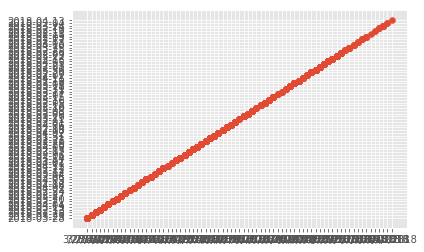

In [15]:
# Lets check the correlation between 'Loan Funded Date' and 'Loan Funded Date3'

plt.scatter(mydata['Loan Funded Date'], mydata['Loan Funded Date3'])
plt.show()

#From the plot, we can see that these two values are highly correlated. So, we can drop one of them.


In [16]:
mydata = mydata.drop(['Time of Application'], axis =1)

In [17]:
mydata = mydata.drop(['Loan Funded Date3'], axis=1)

In [18]:
# From the table, we can see that the 'Loan Funded Date' and 'Dates' have the same value, we can drop one of them.

mydata=mydata.drop(['Loan Funded Date'], axis =1)

Here, we need to know that the 'Time of Application', 'Loan Funded Date', 'Loan Funded Date3', 'Dates' were processed to extract two new variables: 'Dates, 'Week_days and 'Loan Approval Duration (Days)'. So, we can drop these variables.


Since, Banking and Financial system has the online services, people can apply for the loan at any time from anywhere. Customer may apply for the loan via online services during office hour also. So, the "Time" column is not going to be considered for this analysis. 

In [19]:
mydata=mydata.drop(['Time'], axis =1)

Since, 'Loan Due Date' and 'LoanDays' gives the duration of the loan (meaning they are highly correlated), 'Loan Due Date' is going to be dropped for this analysis.

In [20]:
mydata=mydata.drop(['Loan Due Date'], axis =1)

In [21]:
mydata.head()

,SetID,State,Monthly Net Income,Paycheck Net Income,Rent or Own,Months at Residence,Bank Account Months,Pay Cycle,Loan Amount,First Payment Default1,First Payment Default12,Loan Due Date_Dummy,Loan Funded Date_Dummy,LoanDays,Dates,Week_Day,Loan Approval Duration (Days)
0,436,CA,2000.0,2000.0,R,12,6,Monthly,300.00,False,0,4,3,14,2018-03-28,Wednesday,0
1,615,TX,3500.0,3500.0,R,60,60,Monthly,641.91,False,0,4,3,14,2018-03-23,Friday,0
2,1251,CA,3000.0,3000.0,R,0,6,Monthly,117.65,True,1,3,2,30,2018-02-28,Wednesday,0
3,440,CA,1500.0,1500.0,R,12,6,Monthly,117.65,False,0,4,3,31,2018-03-28,Wednesday,0
4,1692,CA,2392.0,598.0,R,130,36,Weekly,300.00,False,0,2,2,10,2018-02-13,Tuesday,0


In [22]:
mydata = mydata.drop(['Dates'], axis =1)

In [23]:
mydata = mydata.drop(['SetID'], axis =1)

From the table, we can see that the 'First Payment Default1' and 'First Payment Default12' are correlated. So, 'First Payment Default1' will be dropped

In [24]:
mydata = mydata.drop(['First Payment Default1'], axis =1)

In [25]:
mydata.head()

,State,Monthly Net Income,Paycheck Net Income,Rent or Own,Months at Residence,Bank Account Months,Pay Cycle,Loan Amount,First Payment Default12,Loan Due Date_Dummy,Loan Funded Date_Dummy,LoanDays,Week_Day,Loan Approval Duration (Days)
0,CA,2000.0,2000.0,R,12,6,Monthly,300.00,0,4,3,14,Wednesday,0
1,TX,3500.0,3500.0,R,60,60,Monthly,641.91,0,4,3,14,Friday,0
2,CA,3000.0,3000.0,R,0,6,Monthly,117.65,1,3,2,30,Wednesday,0
3,CA,1500.0,1500.0,R,12,6,Monthly,117.65,0,4,3,31,Wednesday,0
4,CA,2392.0,598.0,R,130,36,Weekly,300.00,0,2,2,10,Tuesday,0


In [26]:
mydata.columns

Index(['State', 'Monthly Net Income', 'Paycheck Net Income', 'Rent or Own',
       'Months at Residence', 'Bank Account Months', 'Pay Cycle',
       'Loan Amount', 'First Payment Default12', 'Loan Due Date_Dummy',
       'Loan Funded Date_Dummy', 'LoanDays', 'Week_Day',
       'Loan Approval Duration (Days)'],
      dtype='object')

### Lets check correlation plot if there is any higly correlated variables

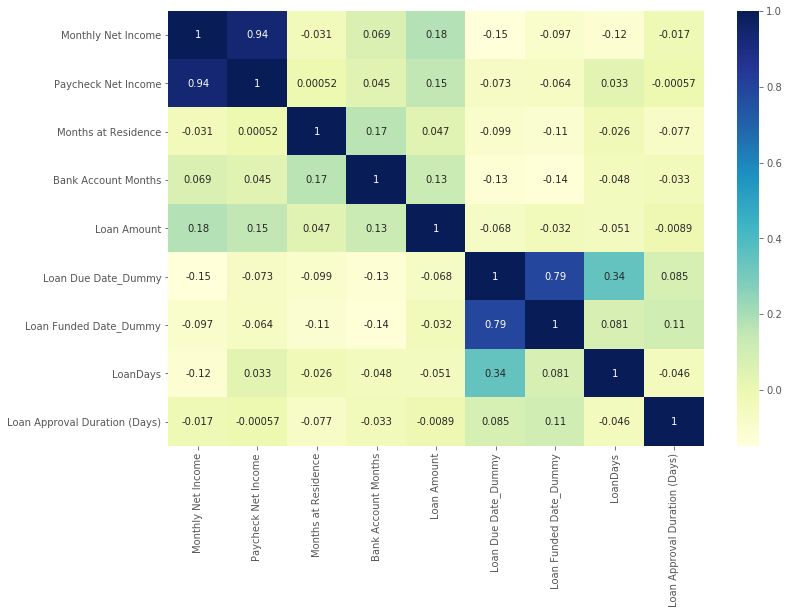

In [27]:
mydata_corr = mydata[['Monthly Net Income', 'Paycheck Net Income', 'Months at Residence', 'Bank Account Months', 
       'Loan Amount', 'Loan Due Date_Dummy', 'Loan Funded Date_Dummy', 'LoanDays', 'Loan Approval Duration (Days)']]

plt.figure(figsize=(12,8))
sns.heatmap(mydata_corr.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [28]:
#From the Correlation plot, we can see that 'Monthly Net Income' and 'Paycheck Net Income' are higly correlated, so one of them will be dropped.

mydata = mydata.drop(['Paycheck Net Income'], axis =1)

In [29]:
# 'LoanDays', 'Loan Funded Date_Dummy',and 'Loan Due Date_Dummy' are higly correlated, so 'Loan Funded Date_Dummy'and 'Loan Due Date_Dummy' will be dropped.
mydata = mydata.drop(['Loan Due Date_Dummy', 'Loan Funded Date_Dummy'], axis =1)

In [30]:
mydata.head()

,State,Monthly Net Income,Rent or Own,Months at Residence,Bank Account Months,Pay Cycle,Loan Amount,First Payment Default12,LoanDays,Week_Day,Loan Approval Duration (Days)
0,CA,2000.0,R,12,6,Monthly,300.00,0,14,Wednesday,0
1,TX,3500.0,R,60,60,Monthly,641.91,0,14,Friday,0
2,CA,3000.0,R,0,6,Monthly,117.65,1,30,Wednesday,0
3,CA,1500.0,R,12,6,Monthly,117.65,0,31,Wednesday,0
4,CA,2392.0,R,130,36,Weekly,300.00,0,10,Tuesday,0


### Visualization

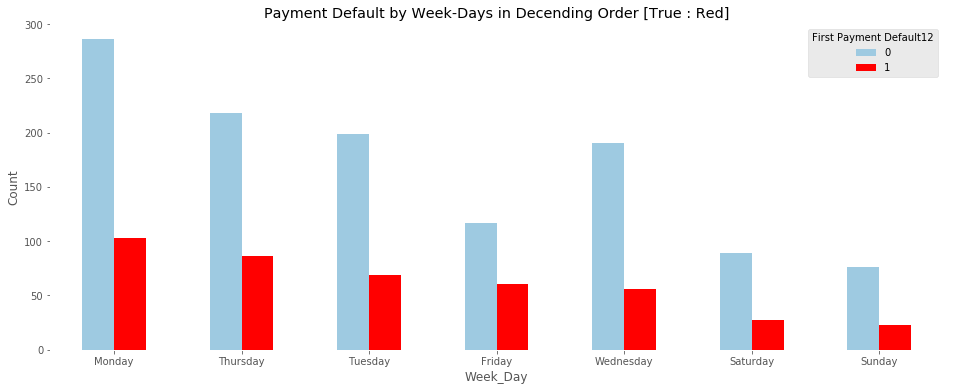

In [31]:
plt.rcParams["figure.figsize"] = (16,6)

vis = pd.crosstab(mydata.Week_Day,mydata['First Payment Default12'])
vis.sort_values(by=[1],ascending=False).plot.bar(color=['#9ecae1', 'red']).set_facecolor("white")

# plot title 
plt.title('Payment Default by Week-Days in Decending Order [True : Red]')
plt.ylabel('Count')
plt.xticks(rotation='horizontal')
plt.show()

| 0 | 1 |
|-|-|
| Default False | Default True |

From the plot we can see that the loan applications on Monday has the highest Default followed by Thursday.

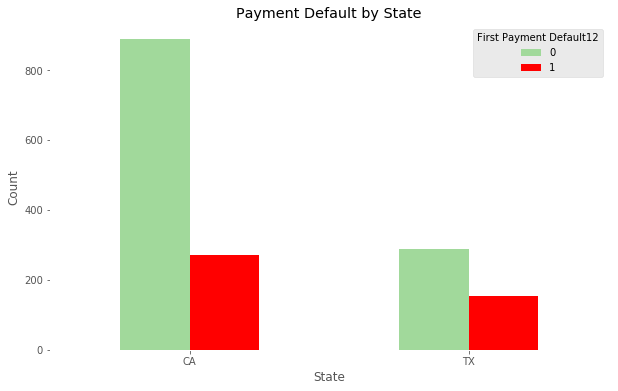

In [32]:
plt.rcParams["figure.figsize"] = (10,6)
vis = pd.crosstab(mydata.State,mydata['First Payment Default12'])
vis.sort_values(by=[1],ascending=False).plot.bar(color=['#a1d99b', 'red']).set_facecolor("white")

# plot title 
plt.title('Payment Default by State')
plt.xticks(rotation='horizontal')
plt.ylabel('Count')
plt.show()

| 0 | 1 |
|-|-|
| Default False | Default True |

From the plot we can see that the default rate is high for the application from Texas.

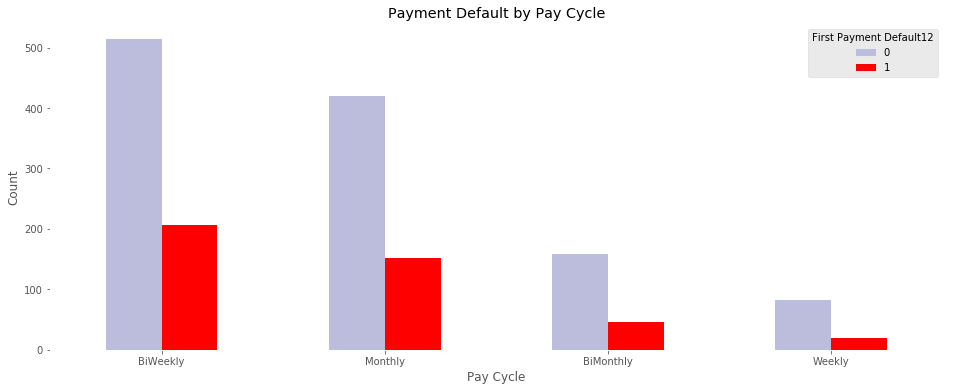

In [33]:
plt.rcParams["figure.figsize"] = (16,6)
vis = pd.crosstab(mydata['Pay Cycle'],mydata['First Payment Default12'])
vis.sort_values(by=[1],ascending=False).plot.bar(color=['#bcbddc', 'red']).set_facecolor("white")

# plot title 
plt.title('Payment Default by Pay Cycle')
plt.xticks(rotation='horizontal')
plt.ylabel('Count')
plt.show()


| 0 | 1 |
|-|-|
| Default False | Default True |

From the plot we can see that the biggest portion of the default loan is for the Bi-weekly Pay Cycle, followed by Monthly pay Cycle

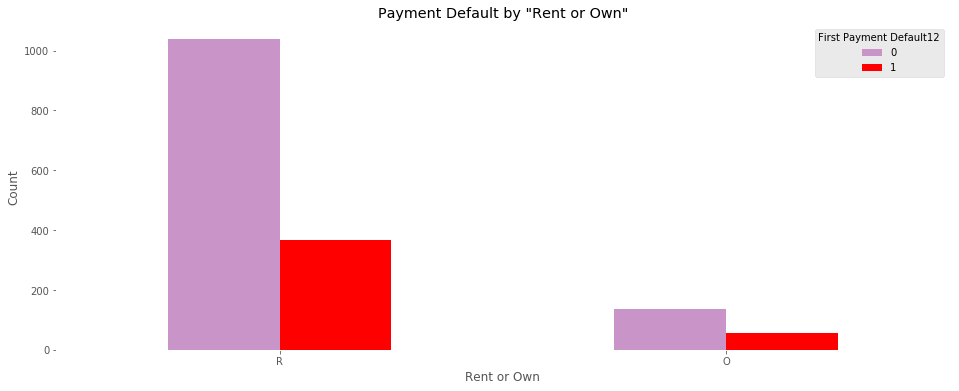

In [34]:
plt.rcParams["figure.figsize"] = (16,6)
vis = pd.crosstab(mydata['Rent or Own'],mydata['First Payment Default12'])
vis.sort_values(by=[1],ascending=False).plot.bar(color=['#c994c7', 'red']).set_facecolor("white")

# plot title 
plt.title('Payment Default by "Rent or Own"')
plt.xticks(rotation='horizontal')
plt.ylabel('Count')
plt.show()

| 0 | 1 |
|-|-|
| Default False | Default True |

From the plot we can see that the most of the loan that are default are for Rent

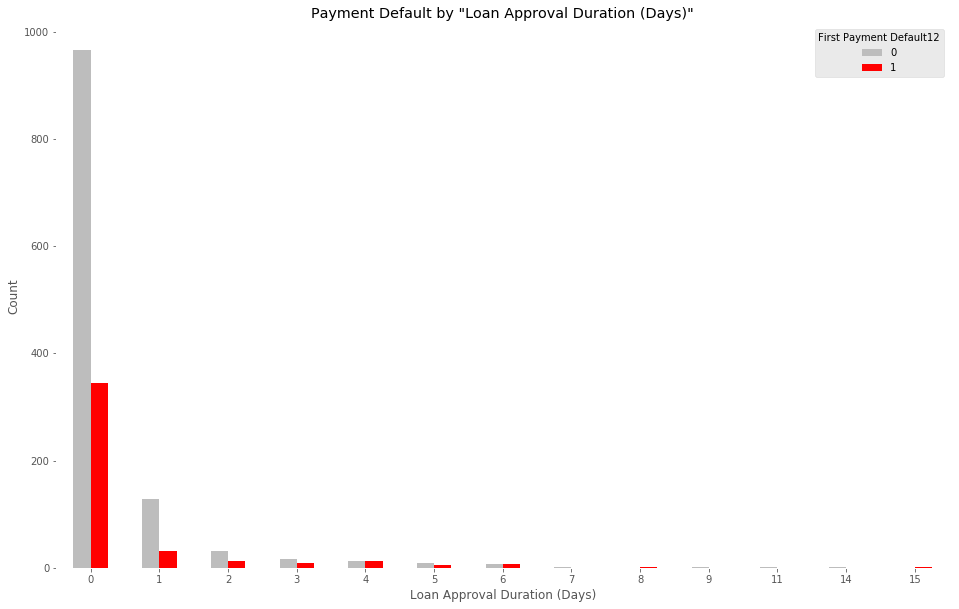

In [35]:
plt.rcParams["figure.figsize"] = (16,10)
vis = pd.crosstab(mydata['Loan Approval Duration (Days)'],mydata['First Payment Default12'])
vis.plot.bar(color=['#bdbdbd', 'red']).set_facecolor("white")

# plot title 
plt.title('Payment Default by "Loan Approval Duration (Days)"')
plt.xticks(rotation='horizontal')
plt.ylabel('Count')
plt.show()

| 0 | 1 |
|-|-|
| Default False | Default True |

From the plot, we can see that big portion of the loan application is approved on the same day. 



In [36]:
mydata['Loan Approval Duration (Days)'].value_counts()

0     1311
1      161
2       44
3       26
4       24
6       14
5       14
15       1
14       1
11       1
9        1
8        1
7        1
Name: Loan Approval Duration (Days), dtype: int64

### Label Encoding and One Hot Encoding

In [37]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [38]:
LE_V1 = LabelEncoder()
mydata['State']=LE_V1.fit_transform(mydata['State'])

In [39]:
LE_V2 = LabelEncoder()
mydata['Rent or Own'] = LE_V2.fit_transform(mydata['Rent or Own'])

In [40]:
mydata = pd.get_dummies(mydata, columns = ['Pay Cycle', 'Week_Day'], prefix = [ 'Pay Cycle', ''])

In [41]:
mydata = pd.DataFrame(mydata)
mydata.head()

,State,Monthly Net Income,Rent or Own,Months at Residence,Bank Account Months,Loan Amount,First Payment Default12,LoanDays,Loan Approval Duration (Days),Pay Cycle_BiMonthly,Pay Cycle_BiWeekly,Pay Cycle_Monthly,Pay Cycle_Weekly,_Friday,_Monday,_Saturday,_Sunday,_Thursday,_Tuesday,_Wednesday
0,0,2000.0,1,12,6,300.00,0,14,0,0,0,1,0,0,0,0,0,0,0,1
1,1,3500.0,1,60,60,641.91,0,14,0,0,0,1,0,1,0,0,0,0,0,0
2,0,3000.0,1,0,6,117.65,1,30,0,0,0,1,0,0,0,0,0,0,0,1
3,0,1500.0,1,12,6,117.65,0,31,0,0,0,1,0,0,0,0,0,0,0,1
4,0,2392.0,1,130,36,300.00,0,10,0,0,0,0,1,0,0,0,0,0,1,0


### Checking Class Imbalance

In [42]:
mydata['First Payment Default12'].value_counts()

0    1175
1     425
Name: First Payment Default12, dtype: int64

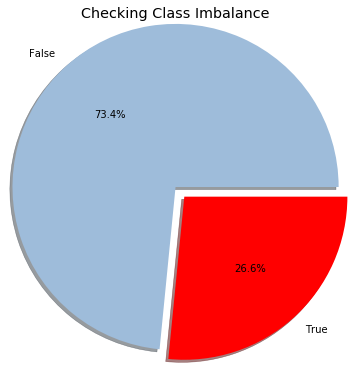

In [43]:
plt.rcParams["figure.figsize"] = (16,6)
plt.title('Checking Class Imbalance')
exp_labels = ['False', 'True']
mydata['First Payment Default12'].value_counts().plot.pie(labels=exp_labels,colors = ['#9ebcda', 'red'], radius = 1.25,shadow=True, autopct = '%0.1f%%',explode =[0, 0.1])
plt.ylabel('')
plt.show()

The Pie Plot illustrates that there is class imbalance. So, we need to stratify the data.

### Train Test Split 

In [44]:
mydata.columns

Index(['State', 'Monthly Net Income', 'Rent or Own', 'Months at Residence',
       'Bank Account Months', 'Loan Amount', 'First Payment Default12',
       'LoanDays', 'Loan Approval Duration (Days)', 'Pay Cycle_BiMonthly',
       'Pay Cycle_BiWeekly', 'Pay Cycle_Monthly', 'Pay Cycle_Weekly',
       '_Friday', '_Monday', '_Saturday', '_Sunday', '_Thursday', '_Tuesday',
       '_Wednesday'],
      dtype='object')

In [45]:
X = mydata[['State', 'Monthly Net Income', 'Rent or Own', 'Months at Residence',
       'Bank Account Months', 'Loan Amount', 
       'LoanDays', 'Loan Approval Duration (Days)', 'Pay Cycle_BiMonthly',
       'Pay Cycle_BiWeekly', 'Pay Cycle_Monthly', 'Pay Cycle_Weekly',
       '_Friday', '_Monday', '_Saturday', '_Sunday', '_Thursday', '_Tuesday',
       '_Wednesday']]

Y = mydata['First Payment Default12']

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, Y, stratify= Y,shuffle=True, test_size=0.2, random_state=42)

In [47]:
y_valid.value_counts()

0    235
1     85
Name: First Payment Default12, dtype: int64

In [48]:
y_train.value_counts()

0    940
1    340
Name: First Payment Default12, dtype: int64

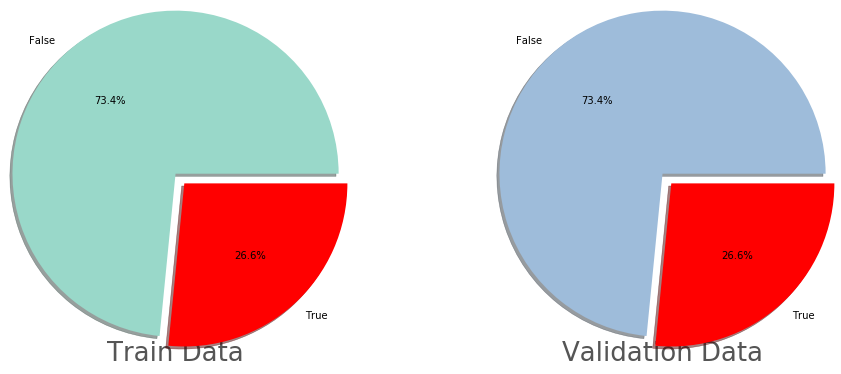

In [49]:
plt.rcParams["figure.figsize"] = (16,6)


exp_labels = ['False', 'True']
#plt.title('Distribution of Labels in the Train and Validation Data after Splitting', y=1.05, fontsize=18)
plt.subplot(1,2,1)
y_train.value_counts().plot.pie(labels=exp_labels,colors = ['#99d8c9', 'red'],  radius = 1.25,shadow=True, autopct = '%0.1f%%',explode =[0, 0.1])
plt.xlabel('Train Data', fontsize=26)
plt.ylabel('')
#plt.suptitle('Train Data')

plt.subplot(1,2,2)
y_valid.value_counts().plot.pie(labels=exp_labels,colors = ['#9ebcda', 'red'], radius = 1.25,shadow=True, autopct = '%0.1f%%',explode =[0, 0.1])
plt.xlabel('Validation Data', fontsize=26)
plt.ylabel('')

#plt.suptitle('Train Data','Validation Data')
#plt.xlabel('Train Data')

plt.show()

|Distribution of Labels in the Train and Validation Data after Splitting|
|-|

## Machine Learning Models

### Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [51]:
lr_model = LogisticRegression(solver ='liblinear')

In [52]:
lr_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [53]:
print(lr_model.coef_)

[[ 1.50077070e-01  3.77168258e-05 -3.98048729e-01 -1.48661387e-03
  -3.21588384e-03  1.17982332e-03  1.68204990e-02  1.09654458e-01
  -4.08268543e-01  9.26093608e-03 -2.96345537e-01 -3.91023598e-01
   4.11452702e-01 -2.28944294e-01 -3.75835149e-01 -2.43345316e-01
   1.73954517e-02 -1.77601098e-01 -4.89499039e-01]]


In [54]:
print(lr_model.intercept_)

[-1.08637674]


In [55]:
y_pred = lr_model.predict(X_valid)

In [56]:
print(confusion_matrix(y_valid,y_pred))  

[[231   4]
 [ 82   3]]


In [57]:
print(classification_report(y_valid,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.98      0.84       235
           1       0.43      0.04      0.07        85

   micro avg       0.73      0.73      0.73       320
   macro avg       0.58      0.51      0.45       320
weighted avg       0.66      0.73      0.64       320



In [58]:
lr_ac = accuracy_score(y_valid, y_pred)
print ("The accuracy of the Logistic Regression on the validation data set  is:", lr_ac)

The accuracy of the Logistic Regression on the validation data set  is: 0.73125


### Decision Tree

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

model = DecisionTreeClassifier(criterion='gini', splitter='best')

In [60]:
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11],
          'random_state':[123]}

#Making models with hyper parameters sets
tc_model = GridSearchCV(model, param_grid=params, n_jobs=-1)

In [61]:
tc_model.fit(X_train,y_train)

C:\Users\PrakashAdhikari\Documents\temp\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_features': ['auto', 'sqrt', 'log2'], 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 'random_state': [123]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [62]:
#The best hyper parameters set
print("Best Hyper Parameters:",tc_model.best_params_)

Best Hyper Parameters: {'max_features': 'auto', 'min_samples_leaf': 11, 'min_samples_split': 2, 'random_state': 123}


In [63]:
#Prediction
y_pred = tc_model.predict(X_valid)

In [64]:
print(confusion_matrix(y_valid,y_pred))  

[[215  20]
 [ 68  17]]


In [65]:
print(classification_report(y_valid,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.91      0.83       235
           1       0.46      0.20      0.28        85

   micro avg       0.72      0.72      0.73       320
   macro avg       0.61      0.56      0.55       320
weighted avg       0.68      0.72      0.68       320



In [66]:
tc_ac = accuracy_score(y_valid, y_pred)
print ("The accuracy of the Decision Tree Classifier on the validation data set  is:", tc_ac)

The accuracy of the Decision Tree Classifier on the validation data set  is: 0.725


In [67]:
best_grid = tc_model.best_estimator_
best_grid

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=11, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best')

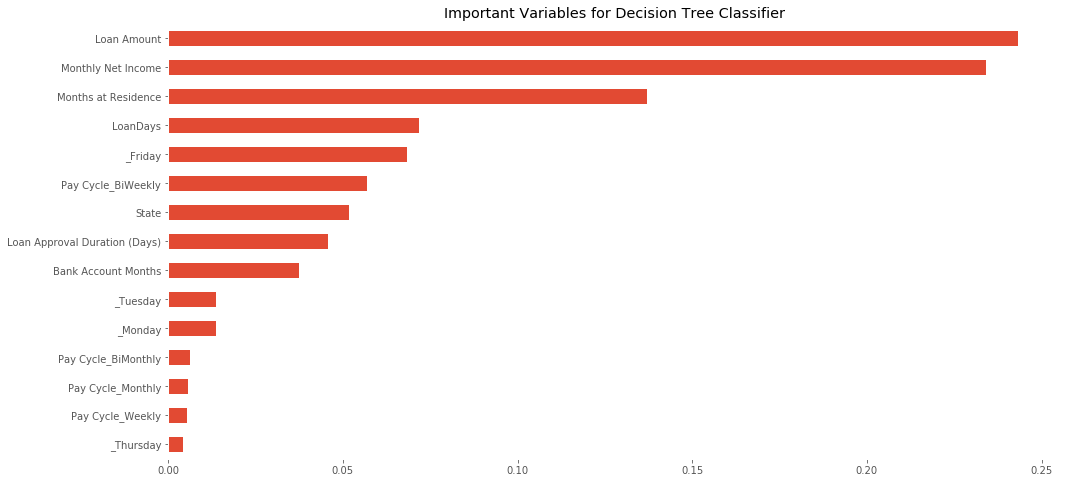

In [68]:
plt.title('Important Variables for Decision Tree Classifier')
feat_importances = pd.Series(best_grid.feature_importances_, index=X_train.columns)
feat_importances.nlargest(15).sort_values(ascending=True).plot(kind='barh', figsize = (16,8)).set_facecolor("white")

### Random Forest Classifier

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'criterion':['gini','entropy'],
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5, 6],
    'min_samples_split': [8, 10, 12, 14],
    'n_estimators': [100, 200, 300, 1000],
    'random_state':[123],
    'n_jobs':[-1]
            }

In [71]:
# Create a based model
rf = RandomForestClassifier()

In [72]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [73]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 1024 candidates, totalling 3072 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   35.0s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 3072 out of 3072 | elapsed: 12.8min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'criterion': ['gini', 'entropy'], 'bootstrap': [True], 'max_depth': [80, 90, 100, 110], 'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5, 6], 'min_samples_split': [8, 10, 12, 14], 'n_estimators': [100, 200, 300, 1000], 'random_state': [123], 'n_jobs': [-1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [74]:
grid_search.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 6,
 'min_samples_split': 14,
 'n_estimators': 1000,
 'n_jobs': -1,
 'random_state': 123}

In [75]:
y_pred = grid_search.predict(X_valid)

In [76]:
print(confusion_matrix(y_valid,y_pred))  

[[234   1]
 [ 75  10]]


In [77]:
print(classification_report(y_valid,y_pred))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86       235
           1       0.91      0.12      0.21        85

   micro avg       0.76      0.76      0.76       320
   macro avg       0.83      0.56      0.53       320
weighted avg       0.80      0.76      0.69       320



In [78]:
rf_ac = accuracy_score(y_valid, y_pred)
print ("The accuracy of the Random Forest Classifier on the validation data set  is:", rf_ac)

The accuracy of the Random Forest Classifier on the validation data set  is: 0.7625


In [79]:
best_grid = grid_search.best_estimator_
best_grid

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=80, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=6, min_samples_split=14,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=123, verbose=0, warm_start=False)

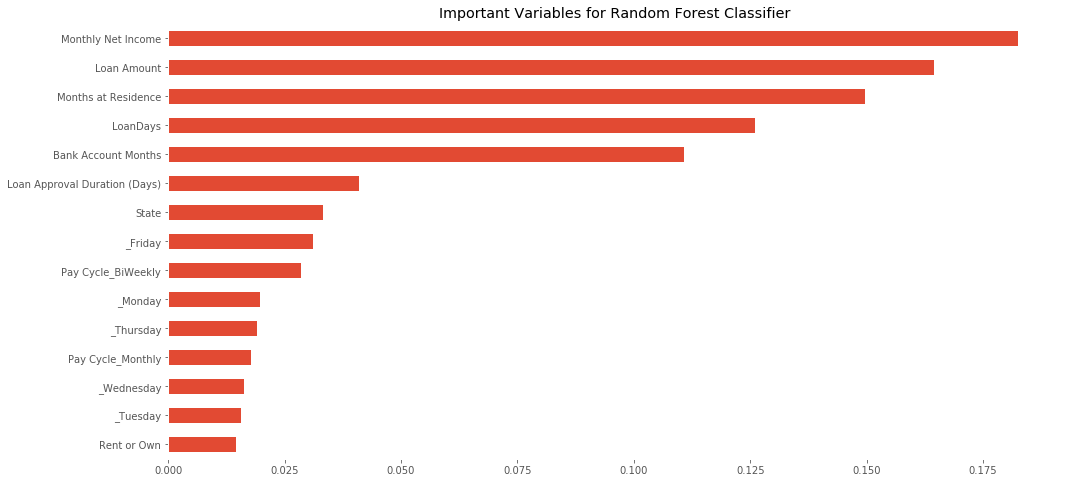

In [80]:
plt.title('Important Variables for Random Forest Classifier')
feat_importances = pd.Series(best_grid.feature_importances_, index=X_train.columns)
feat_importances.nlargest(15).sort_values(ascending=True).plot(kind='barh', figsize = (16,8)).set_facecolor("white")

### Support Vector Machine

In [81]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svm = SVC()

In [82]:
#Hyper Parameters Set
params = {'C': [6,9], 
          'kernel': ['linear','rbf'],
         'gamma': ['scale', 'auto']}

# Tuned with only few parameters just to save time.

In [83]:
grid_search = GridSearchCV(estimator = svm, param_grid = params, cv = 2, n_jobs = -1, verbose = 2)

In [84]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 8 candidates, totalling 16 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  16 | elapsed:  6.3min remaining:  3.8min
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:  8.6min finished


GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [6, 9], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [85]:
grid_search.best_params_

{'C': 6, 'gamma': 'auto', 'kernel': 'rbf'}

In [86]:
y_pred = grid_search.predict(X_valid)

In [87]:
print(confusion_matrix(y_valid,y_pred))  

[[229   6]
 [ 77   8]]


In [88]:
print(classification_report(y_valid,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.97      0.85       235
           1       0.57      0.09      0.16        85

   micro avg       0.74      0.74      0.74       320
   macro avg       0.66      0.53      0.50       320
weighted avg       0.70      0.74      0.66       320



In [89]:
svm_ac = accuracy_score(y_valid, y_pred)
print ("The accuracy of the Support Vector Machine on the validation data set  is:", svm_ac)

The accuracy of the Support Vector Machine on the validation data set  is: 0.740625


In [90]:
best_grid = grid_search.best_estimator_
best_grid

SVC(C=6, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Deep Learning Neural Network

In [91]:
import tensorflow as tf
from tensorflow.python.keras.models import load_model
#from sklearn.metrics import mean_squared_error
import gc; gc.enable()

Build the Model

In [92]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(128,  input_dim=len(X_train.columns), activation ='relu', kernel_initializer = tf.random_normal_initializer))

model.add(tf.keras.layers.Dense(256, activation="tanh", kernel_initializer = tf.random_normal_initializer))

model.add(tf.keras.layers.Dense(128, activation="sigmoid", kernel_initializer = tf.random_normal_initializer))

model.add(tf.keras.layers.Dense(64, activation="relu", kernel_initializer = tf.random_normal_initializer))

#model.add(tf.keras.layers.Dense(32, activation="relu", kernel_initializer = tf.random_normal_initializer))

model.add(tf.keras.layers.Dense(1, activation ='softmax', kernel_initializer = tf.random_normal_initializer)) 
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               2560      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 76,801
Trainable params: 76,801
Non-trainable params: 0
_________________________________________________________________


In [93]:
layer_input = model.layers[0]
print(layer_input.get_weights()[0].shape)

(19, 128)


In [94]:
model.compile(optimizer= 'adam',#'rmsprop',
              loss= 'binary_crossentropy', #'sparse_categorical_crossentropy', #
              metrics=['accuracy'])

In [95]:
learning_rate = 0.01
epochs_value = 100
batch_size_value = 8

In [96]:
# learning/Training the model

training_model = model.fit( X_train,  y_train, 
                           batch_size =batch_size_value, 
                           epochs=epochs_value,
                           validation_data=(X_valid, y_valid))
                         

Train on 1280 samples, validate on 320 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1280/1280 [==============================] - 1s 391us/sample - loss: 11.7077 - acc: 0.2656 - val_loss: 11.7077 - val_acc: 0.2656
Epoch 2/100
1280/1280 [==============================] - 0s 332us/sample - loss: 11.7077 - acc: 0.2656 - val_loss: 11.7077 - val_acc: 0.2656
Epoch 3/100
1280/1280 [==============================] - 0s 168us/sample - loss: 11.7077 - acc: 0.2656 - val_loss: 11.7077 - val_acc: 0.2656
Epoch 4/100
1280/1280 [==============================] - 0s 183us/sample - loss: 11.7077 - acc: 0.2656 - val_loss: 11.7077 - val_acc: 0.2656
Epoch 5/100
1280/1280 [==============================] - 0s 197us/sample - loss: 11.7077 - acc: 0.2656 - val_loss: 11.7077 - val_acc: 0.2656
Epoch 6/100
1280/1280 [==============================] - 0s 198us/sample - loss: 11.7077 - acc: 0.2656 - val_loss: 11.7077 - val_acc: 0.2656
Epoch 7/100
1280/1280 [==============================] - 0s

1280/1280 [==============================] - 0s 202us/sample - loss: 11.7077 - acc: 0.2656 - val_loss: 11.7077 - val_acc: 0.2656
Epoch 57/100
1280/1280 [==============================] - 0s 197us/sample - loss: 11.7077 - acc: 0.2656 - val_loss: 11.7077 - val_acc: 0.2656
Epoch 58/100
1280/1280 [==============================] - 0s 207us/sample - loss: 11.7077 - acc: 0.2656 - val_loss: 11.7077 - val_acc: 0.2656
Epoch 59/100
1280/1280 [==============================] - 0s 199us/sample - loss: 11.7077 - acc: 0.2656 - val_loss: 11.7077 - val_acc: 0.2656
Epoch 60/100
1280/1280 [==============================] - 0s 200us/sample - loss: 11.7077 - acc: 0.2656 - val_loss: 11.7077 - val_acc: 0.2656
Epoch 61/100
1280/1280 [==============================] - 0s 201us/sample - loss: 11.7077 - acc: 0.2656 - val_loss: 11.7077 - val_acc: 0.2656
Epoch 62/100
1280/1280 [==============================] - 0s 195us/sample - loss: 11.7077 - acc: 0.2656 - val_loss: 11.7077 - val_acc: 0.2656
Epoch 63/100
1280/1

Evaluate on the Validation Data

In [97]:
model.evaluate(X_valid, y_valid)

320/320 [==============================] - 0s 31us/sample - loss: 11.7077 - acc: 0.2656


[11.70768928527832, 0.265625]

Making Prediction

In [98]:
y_pred = model.predict(X_valid) #, verbose=1)

In [99]:
print(confusion_matrix(y_valid,y_pred))  

[[  0 235]
 [  0  85]]


In [100]:
print(classification_report(y_valid,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       235
           1       0.27      1.00      0.42        85

   micro avg       0.27      0.27      0.27       320
   macro avg       0.13      0.50      0.21       320
weighted avg       0.07      0.27      0.11       320



C:\Users\PrakashAdhikari\Documents\temp\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\PrakashAdhikari\Documents\temp\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\PrakashAdhikari\Documents\temp\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [101]:
dlnn_ac = accuracy_score(y_valid, y_pred)
print ("The accuracy of the Neural Network on the validation data set  is:", dlnn_ac)

The accuracy of the Neural Network on the validation data set  is: 0.265625


Unfortunately, the Deep Learning Neural Network did not perform good.

### KNN Classifier

In [102]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

In [103]:
param_grid = {
    'n_neighbors': [4,5,6,7],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    
    'n_jobs':[-1]
            }

In [104]:
grid_search = GridSearchCV(estimator = knn, param_grid = param_grid, cv = 2, n_jobs = -1, verbose = 2)

In [105]:
grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 16 candidates, totalling 32 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    1.2s finished


GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_neighbors': [4, 5, 6, 7], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'n_jobs': [-1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [106]:
grid_search.best_params_

{'algorithm': 'auto', 'n_jobs': -1, 'n_neighbors': 6}

In [107]:
y_pred = grid_search.predict(X_valid)

In [108]:
print(confusion_matrix(y_valid,y_pred))  

[[227   8]
 [ 73  12]]


In [109]:
print(classification_report(y_valid,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.97      0.85       235
           1       0.60      0.14      0.23        85

   micro avg       0.75      0.75      0.75       320
   macro avg       0.68      0.55      0.54       320
weighted avg       0.72      0.75      0.68       320



In [110]:
knn_ac = accuracy_score(y_valid, y_pred)
print ("The accuracy of the KNN Classifier on the validation data set  is:", knn_ac)

The accuracy of the KNN Classifier on the validation data set  is: 0.746875


In [111]:
best_grid = grid_search.best_estimator_
best_grid

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=6, p=2,
           weights='uniform')

### Lets Documents all the Models and their Accuracies

In [112]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','Random Forest Classifier', 'Decision Tree Classifier', 'KNN Classifier', 'Deep Learning Neural Network', 'Support Vector Machine'],
    'Accuracy': [lr_ac, rf_ac, tc_ac, knn_ac, dlnn_ac, svm_ac]
    
    }) 
models.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
1,Random Forest Classifier,0.762500
3,KNN Classifier,0.746875
5,Support Vector Machine,0.740625
0,Logistic Regression,0.731250
2,Decision Tree Classifier,0.725000
4,Deep Learning Neural Network,0.265625


Random Forest Classifier model turned to be the best model. 

# Lets train the Random Forest Classifier Model on the whole data set:

Best Model for making Prediction on the Test Data

In [113]:
from sklearn.ensemble import RandomForestClassifier

In [114]:
model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=80, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=123, verbose=0, warm_start=False)

# These are the parameters that were obtained by tuning hyper parameters.

In [115]:
# Lets train the Random Forest Classifier model on the whole data set

model.fit(X,Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=80, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=123, verbose=0, warm_start=False)

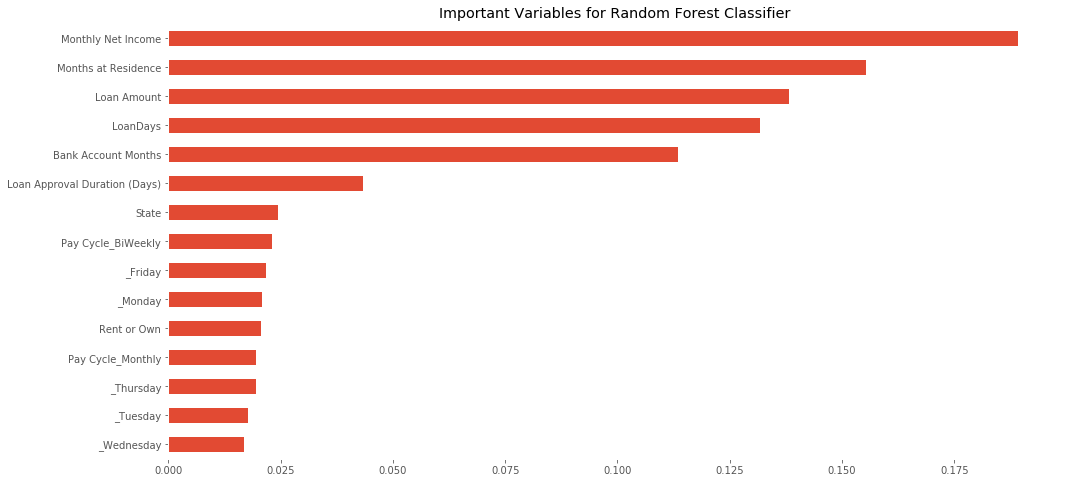

In [116]:
plt.title('Important Variables for Random Forest Classifier')
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(15).sort_values(ascending=True).plot(kind='barh', figsize = (16,8)).set_facecolor("white")

The Important Variables gives the variables that have significant contribution on making the prediction. From the plot, we can see that while making decision whether to approve loan or not, the following variables should be given priority:

Monthly Net Income, Months at Residence, Loan Amount, Loan Days, Bank Account Months, Loan Approval Duration, and so on and so forth.

# Preparation of the Test Data 

In [117]:
test = pd.read_csv("2018-05-17-Recruit-Sample-Data-Test.csv")
test.head()

,SetID,Time of Application,State,Monthly Net Income,Paycheck Net Income,Rent or Own,Months at Residence,Bank Account Months,Pay Cycle,Loan Amount,Loan Funded Date,Loan Due Date,LoanDays
0,1,2018-04-09T23:25:18Z,CA,1894.0,947.0,R,8,30,BiWeekly,300.00,4/10/2018,4/20/2018,10
1,4,2018-04-09T20:34:56Z,TX,5000.0,5000.0,O,36,36,Monthly,642.46,4/10/2018,4/27/2018,17
2,14,2018-04-09T17:41:37Z,TX,2500.0,2500.0,O,108,6,Monthly,644.24,4/9/2018,5/10/2018,31
3,19,2018-04-09T16:33:35Z,CA,2902.0,1451.0,R,48,36,BiWeekly,300.00,4/9/2018,4/20/2018,11
4,28,2018-04-09T14:51:15Z,CA,5000.0,5000.0,R,12,12,Monthly,235.30,4/9/2018,4/30/2018,21


In [118]:
test.shape

(400, 13)

In [119]:
test.isnull().sum()

SetID                  0
Time of Application    0
State                  0
Monthly Net Income     0
Paycheck Net Income    0
Rent or Own            0
Months at Residence    0
Bank Account Months    0
Pay Cycle              0
Loan Amount            0
Loan Funded  Date      0
Loan Due Date          0
LoanDays               0
dtype: int64

In [120]:
test['Dates'] = pd.to_datetime(test['Time of Application']).dt.date
test['Time'] = pd.to_datetime(test['Time of Application']).dt.time

In [121]:
test.head()

,SetID,Time of Application,State,Monthly Net Income,Paycheck Net Income,Rent or Own,Months at Residence,Bank Account Months,Pay Cycle,Loan Amount,Loan Funded Date,Loan Due Date,LoanDays,Dates,Time
0,1,2018-04-09T23:25:18Z,CA,1894.0,947.0,R,8,30,BiWeekly,300.00,4/10/2018,4/20/2018,10,2018-04-09,23:25:18
1,4,2018-04-09T20:34:56Z,TX,5000.0,5000.0,O,36,36,Monthly,642.46,4/10/2018,4/27/2018,17,2018-04-09,20:34:56
2,14,2018-04-09T17:41:37Z,TX,2500.0,2500.0,O,108,6,Monthly,644.24,4/9/2018,5/10/2018,31,2018-04-09,17:41:37
3,19,2018-04-09T16:33:35Z,CA,2902.0,1451.0,R,48,36,BiWeekly,300.00,4/9/2018,4/20/2018,11,2018-04-09,16:33:35
4,28,2018-04-09T14:51:15Z,CA,5000.0,5000.0,R,12,12,Monthly,235.30,4/9/2018,4/30/2018,21,2018-04-09,14:51:15


In [122]:
def week_day(x):
    return [i.strftime("%A") for i in x]

test['Week_Day'] = week_day(test.Dates)

In [123]:
test['Week_Day'].nunique()

7

In [124]:
test.columns

Index(['SetID', 'Time of Application', 'State', 'Monthly Net Income',
       'Paycheck Net Income', 'Rent or Own', 'Months at Residence',
       'Bank Account Months', 'Pay Cycle', 'Loan Amount', 'Loan Funded  Date',
       'Loan Due Date', 'LoanDays', 'Dates', 'Time', 'Week_Day'],
      dtype='object')

In [125]:
test['Loan Funded  Date'] = pd.to_datetime(test['Loan Funded  Date']).dt.date

In [126]:
test['Loan Approval Duration (Days)'] = Loan_Approval_Duration(test['Dates'], test['Loan Funded  Date'])

In [127]:
test['Loan Approval Duration (Days)'] =  test['Loan Approval Duration (Days)'].dt.days.astype('int16')

In [128]:
pd.Series(test['Loan Approval Duration (Days)'].unique())

0    1
1    0
2    3
3    6
4    7
5    5
6    2
7    9
8    4
9    8
dtype: int64

In [129]:
test.head()

,SetID,Time of Application,State,Monthly Net Income,Paycheck Net Income,Rent or Own,Months at Residence,Bank Account Months,Pay Cycle,Loan Amount,Loan Funded Date,Loan Due Date,LoanDays,Dates,Time,Week_Day,Loan Approval Duration (Days)
0,1,2018-04-09T23:25:18Z,CA,1894.0,947.0,R,8,30,BiWeekly,300.00,2018-04-10,4/20/2018,10,2018-04-09,23:25:18,Monday,1
1,4,2018-04-09T20:34:56Z,TX,5000.0,5000.0,O,36,36,Monthly,642.46,2018-04-10,4/27/2018,17,2018-04-09,20:34:56,Monday,1
2,14,2018-04-09T17:41:37Z,TX,2500.0,2500.0,O,108,6,Monthly,644.24,2018-04-09,5/10/2018,31,2018-04-09,17:41:37,Monday,0
3,19,2018-04-09T16:33:35Z,CA,2902.0,1451.0,R,48,36,BiWeekly,300.00,2018-04-09,4/20/2018,11,2018-04-09,16:33:35,Monday,0
4,28,2018-04-09T14:51:15Z,CA,5000.0,5000.0,R,12,12,Monthly,235.30,2018-04-09,4/30/2018,21,2018-04-09,14:51:15,Monday,0


In [130]:
test = test.drop(['SetID', 'Time of Application','Paycheck Net Income','Loan Funded  Date', 'Loan Due Date', 'Dates', 'Time' ], axis =1)

In [131]:
test.columns

Index(['State', 'Monthly Net Income', 'Rent or Own', 'Months at Residence',
       'Bank Account Months', 'Pay Cycle', 'Loan Amount', 'LoanDays',
       'Week_Day', 'Loan Approval Duration (Days)'],
      dtype='object')

In [132]:
test.head()

,State,Monthly Net Income,Rent or Own,Months at Residence,Bank Account Months,Pay Cycle,Loan Amount,LoanDays,Week_Day,Loan Approval Duration (Days)
0,CA,1894.0,R,8,30,BiWeekly,300.00,10,Monday,1
1,TX,5000.0,O,36,36,Monthly,642.46,17,Monday,1
2,TX,2500.0,O,108,6,Monthly,644.24,31,Monday,0
3,CA,2902.0,R,48,36,BiWeekly,300.00,11,Monday,0
4,CA,5000.0,R,12,12,Monthly,235.30,21,Monday,0


In [133]:
LE_V1 = LabelEncoder()
test['State']=LE_V1.fit_transform(test['State'])

In [134]:
LE_V2 = LabelEncoder()
test['Rent or Own'] = LE_V2.fit_transform(test['Rent or Own'])

In [135]:
test = pd.get_dummies(test, columns = ['Pay Cycle', 'Week_Day'], prefix = [ 'Pay Cycle', ''])

In [136]:
test = pd.DataFrame(test)
test.head()

,State,Monthly Net Income,Rent or Own,Months at Residence,Bank Account Months,Loan Amount,LoanDays,Loan Approval Duration (Days),Pay Cycle_BiMonthly,Pay Cycle_BiWeekly,Pay Cycle_Monthly,Pay Cycle_Weekly,_Friday,_Monday,_Saturday,_Sunday,_Thursday,_Tuesday,_Wednesday
0,0,1894.0,1,8,30,300.00,10,1,0,1,0,0,0,1,0,0,0,0,0
1,1,5000.0,0,36,36,642.46,17,1,0,0,1,0,0,1,0,0,0,0,0
2,1,2500.0,0,108,6,644.24,31,0,0,0,1,0,0,1,0,0,0,0,0
3,0,2902.0,1,48,36,300.00,11,0,0,1,0,0,0,1,0,0,0,0,0
4,0,5000.0,1,12,12,235.30,21,0,0,0,1,0,0,1,0,0,0,0,0


# Prediction of the Best Model on the Test Data

In [137]:
Predicted_Values = model.predict(test)
Predicted_Values = pd.DataFrame(Predicted_Values)
Predicted_Values.head()

,0
0,0
1,0
2,0
3,0
4,0


In [138]:
Predicted_Values.rename(columns = {0: 'First Payment Default12'}, inplace = True)
Predicted_Values.head()

,First Payment Default12
0,0
1,0
2,0
3,0
4,0


In [139]:
Predicted_Files = pd.concat([test,Predicted_Values],ignore_index = False, verify_integrity=True, axis =1)

In [140]:
Predicted_Files.head()

,State,Monthly Net Income,Rent or Own,Months at Residence,Bank Account Months,Loan Amount,LoanDays,Loan Approval Duration (Days),Pay Cycle_BiMonthly,Pay Cycle_BiWeekly,Pay Cycle_Monthly,Pay Cycle_Weekly,_Friday,_Monday,_Saturday,_Sunday,_Thursday,_Tuesday,_Wednesday,First Payment Default12
0,0,1894.0,1,8,30,300.00,10,1,0,1,0,0,0,1,0,0,0,0,0,0
1,1,5000.0,0,36,36,642.46,17,1,0,0,1,0,0,1,0,0,0,0,0,0
2,1,2500.0,0,108,6,644.24,31,0,0,0,1,0,0,1,0,0,0,0,0,0
3,0,2902.0,1,48,36,300.00,11,0,0,1,0,0,0,1,0,0,0,0,0,0
4,0,5000.0,1,12,12,235.30,21,0,0,0,1,0,0,1,0,0,0,0,0,0


In [141]:
Predicted_Files.to_csv('Predicted_Files.csv')